In [65]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [73]:
def predict(filename, filename_out, conf_int=0.95, ws=False, ms=False, predfreq='MS'):
    '''
    filename: string, csv-file with data
    filename_out: string, output file
    conf_int: float, confidence interval
    ws: bool, weekly seasonality
    ms: bool, monthly seasonality
    predfreq: string, 'MS' for months (I think!)
    
    returns: csv
    '''
    df = pd.read_csv('passengers.csv')
    
    df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})
    # required by prophet-package
    
    my_model = Prophet(interval_width=conf_int, weekly_seasonality=ws)#, monthly_seasonality=ms)
    my_model.fit(df)
    
    future_dates = my_model.make_future_dataframe(periods=36, freq=predfreq)
    forecast = my_model.predict(future_dates)
    
    forecast.to_csv(path_or_buf=filename_out)

In [75]:
predict('passengers.csv', 'out.csv')

In [45]:
df = pd.read_csv('passengers.csv')

df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [46]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [47]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


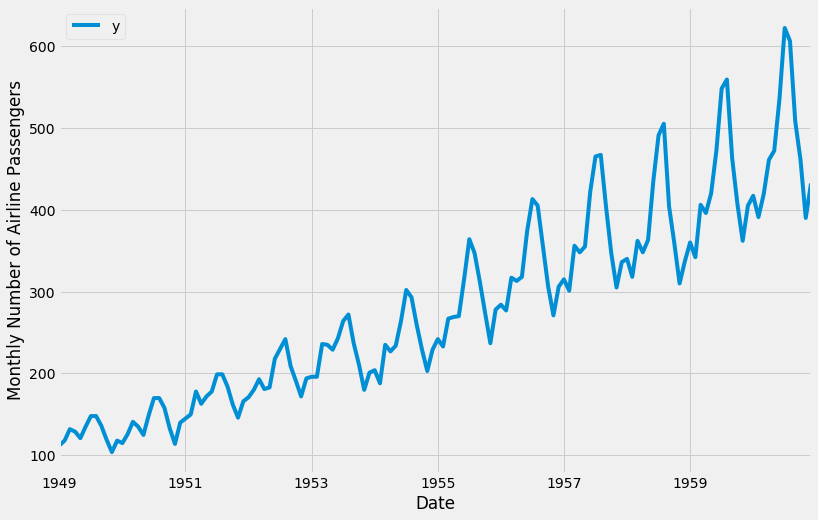

In [48]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [49]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [50]:
my_model.fit(df)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [51]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [52]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.098798,605.061732,694.632968
176,1963-09-01,601.744182,553.881848,645.806279
177,1963-10-01,565.620272,523.037930,606.009694
178,1963-11-01,533.682598,490.875297,576.941103
179,1963-12-01,563.207536,516.408952,605.249296


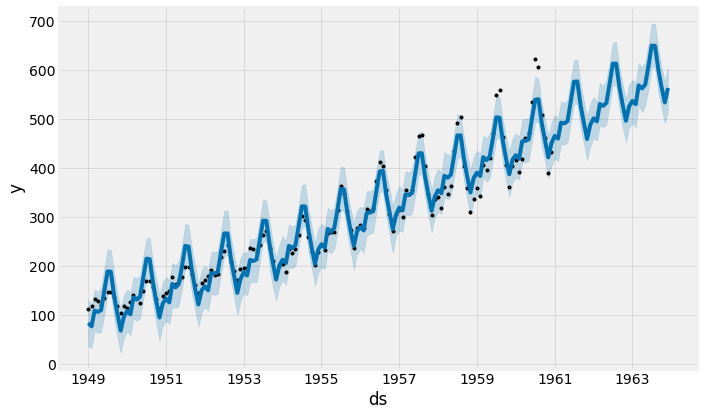

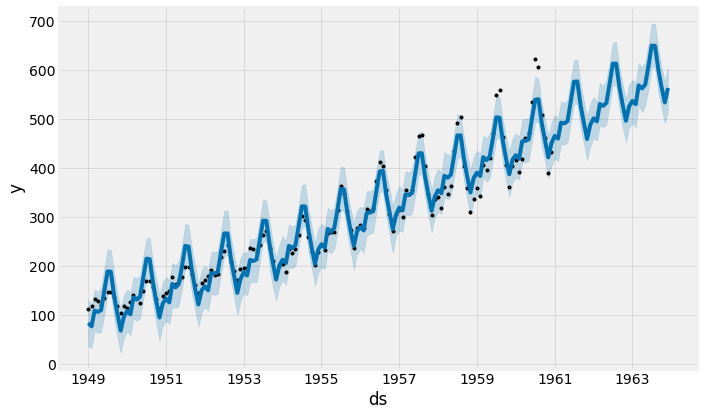

In [53]:
my_model.plot(forecast,
              uncertainty=True)

In [54]:
df = pd.read_csv('out.csv')
df.head(5)

,Unnamed: 0,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,0,1949-01-01,0.000000,105.439746,-21.619211,-21.619211,105.439746,105.439746,38.298598,127.275221,-21.619211,-21.619211,-21.619211,-21.619211,83.820535
1,1,1949-02-01,0.007123,107.639535,-30.421617,-30.421617,107.639535,107.639535,33.131655,121.855467,-30.421617,-30.421617,-30.421617,-30.421617,77.217919
2,2,1949-03-01,0.013557,109.626442,-0.587259,-0.587259,109.626442,109.626442,64.724595,152.980418,-0.587259,-0.587259,-0.587259,-0.587259,109.039183
3,3,1949-04-01,0.020680,111.826231,-5.167511,-5.167511,111.826231,111.826231,62.585363,150.137221,-5.167511,-5.167511,-5.167511,-5.167511,106.658720
4,4,1949-05-01,0.027574,113.955059,-3.797443,-3.797443,113.955059,113.955059,66.412713,154.764887,-3.797443,-3.797443,-3.797443,-3.797443,110.157616


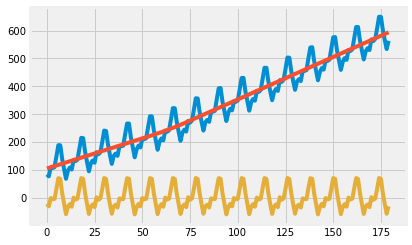

In [76]:
plt.plot(df['yhat'])
#plt.plot(df['yhat_lower'])
#plt.plot(df['yhat_upper'])
plt.plot(df['trend'])
plt.plot(df['yearly'])